# 3 Data integration in a single matrix (Infected samples)

Made by: Cynthia Soto <br>
Date: 20 de Octubre 2020 <br>
Last md: 24 de febrero 2021 (added + samples) <br>

Data quantified with HTSeq (alignments done with STAR SA)  <br>
Datatype: normalized values in log2 <br>

Normalized data will be integrated in a single matrix <br>

**Workflow:** <br>
1) Merge the individual expression files in a single matrix<br>
2) Zeros across all samples are dropped.  <br>
3) Basic statistics are built on diferent filtered-setups on the matrix.  <br>

In [1]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts


## Funtions to be called in the file

In [3]:
# Rename columns on  a df according to your story
def set_ID_samples(df):
    df = df.rename(columns={'SRR10586397': 'Bc24', 'SRR364399':'Ch40.3','SRR364401':'Ch40',
                                         'SRR6283148':'Ss30','SRR6283147':'Ss30.1','SRR3383696':'Bc12',
                                         'SRR3383780':'Bc18','SRR6283146':'Ss30.2','SRR3383779':'Bc18.1',
                                         'SRR3383697':'Bc12.1','SRR364390':'Ch22','SRR364389':'Ch22.1',
                                         'SRR364400':'Ch40.1','SRR364391':'Ch22.2','SRR10586399':'Bc24.1',
                                         'SRR364392':'Ch22.3','SRR364398':'Ch40.2'})
    return df 

In [4]:
# Set ID index as "ID" to a describe() function in a df
def df_with_label_ID(df_stat):
    df_stat.reset_index(level=0, inplace=True)
    df_stat.rename(columns={'index': 'ID'}, inplace=True)
    
    ## use this chunk if you want to give IDs to a describe() functions from a external meta-data
    #     file='../meta-data/ID_samples.csv'
    #     df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
    #     #print(df_meta.head(5))
    #     ## merge by sample field
    #     df = pd.merge(df, df_meta, on="sample")    
    df_stat = df_stat.sort_values(['ID'], ascending=[True])   
    return df_stat 

In [5]:
## Function to remove genes from a df based on a list of indexes provided of the df
def df_drop_idx_list(df_idx, df_d):  #, df1_d

    ## get a list of gene idx to be remove provided in the df_idx 
    ## drop this idx list from the df provided (df_d)
    ## return the df with the idx provided removed
    
    ## Get the indexes of the gene rows to delete from the df provided
    lst_genes_to_drop=(df_idx.index)
    ## drop the idx marked    
    for i in lst_genes_to_drop: 
        try:
            df_d = df_d.drop([i])
        except:
            pass # doing nothing on exception, not processed because it is already dropped"
    
    return df_d 

In [6]:
# Filter a dataframe by the value of a column (I used to set a cutoff threshold)
def filter_df(df, *args):

    # Input: df is the dataframe to filter and *args are the criteria to apply
    # output: a new dataframe filtered 
    
    for k, v in args:
        df_cut = df[df[k] >= v]
    return df_cut

## (end) Funtions 

## Integration to all data files (samples) in one matrix 

In [7]:
## check a bit of the files to be processed ... are they ok?
all_files = glob.glob(s_path)
for file in all_files:
    print(file)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR10586397_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR364399_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR364401_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR6283148_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR6283147_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR3383696_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR3383780_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR6283146_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR3383779_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/SRR3383697_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analy

## Integrate the log2 expresssion data into a single dataframe

In [8]:
all_files = glob.glob(s_path)
## To load the main df
flag_b=True

for file in all_files:
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]
    #print(x1)
    
    if flag_b:    ## load main df once
        #print(file)
        ## Main df is df1
        df1=pd.read_csv(file, sep='\t', usecols=[1,3])    ## nrows=100, 
        ## remove unnamed cols
        df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
        df1.rename(columns={'log2_value':x1},inplace=True)
        #print(df1) 
        flag_b=False
    else:
        #print(file)
        df2= pd.read_csv(file, sep='\t', usecols=[1,3])     ## nrows=100, 
        ## remove unnamed cols
        df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)      
        ## compare matrix gene_names before concatenated
        comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
        if (False in comparison_column):
            print("Gene_names are not the same. Matrix "+file+" will not be concatenated.")
        else:
            ## merge matrix based in column name "Genes"
            df2.rename(columns={'log2_value':x1},inplace=True)
            df1=df1.merge(df2,on=['Genes'],how='left')
        

In [9]:
df1.head()

,Genes,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808


In [10]:
# call a function to set label sample's as IDs
df1 = set_ID_samples(df1)

In [11]:
df1.head(5)
#df1.to_csv('../results-data/all_infected_log2.csv', sep='\t', index=True)

,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808


## Some stats of the new df

1) Descriptive stats are calculate on the new df<br>
2) IDs of genes with cero counts across all the samples are identified and summarized.<br>
3) IDs identified are dropped from the the df to compose a new df filtered. <br>

In [12]:
df_plot=df1.describe().T
df_plot.head(5)

,count,mean,std,min,25%,50%,75%,max
Bc24,27655.0,5.861618,3.989994,0.0,1.584963,6.794416,9.108524,17.465495
Ch40.3,27655.0,4.750295,3.709542,0.0,0.000000,5.285402,7.854865,16.122181
Ch40,27655.0,4.817807,3.692874,0.0,0.000000,5.459432,7.900867,16.174438
Ss30,27655.0,3.061983,3.329893,0.0,0.000000,2.000000,5.584963,16.665294
Ss30.1,27655.0,3.122718,3.371068,0.0,0.000000,2.000000,5.672425,16.796078


In [13]:
## call the fuction df_with_label_ID
df_plot = df_with_label_ID(df_plot)
df_plot.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
5,Bc12,27655.0,5.009321,3.883234,0.0,0.000000,5.857981,8.303781,17.584786
9,Bc12.1,27655.0,5.183564,3.985065,0.0,0.000000,6.108524,8.554589,17.972750
6,Bc18,27655.0,5.013277,3.933417,0.0,0.000000,5.807355,8.392317,17.338092
8,Bc18.1,27655.0,4.723591,3.748101,0.0,0.000000,5.426265,7.900867,17.307619
0,Bc24,27655.0,5.861618,3.989994,0.0,1.584963,6.794416,9.108524,17.465495


In [15]:
df_plot.to_csv("../results-data/infected_stats_tesis.csv", index=False, header=True)

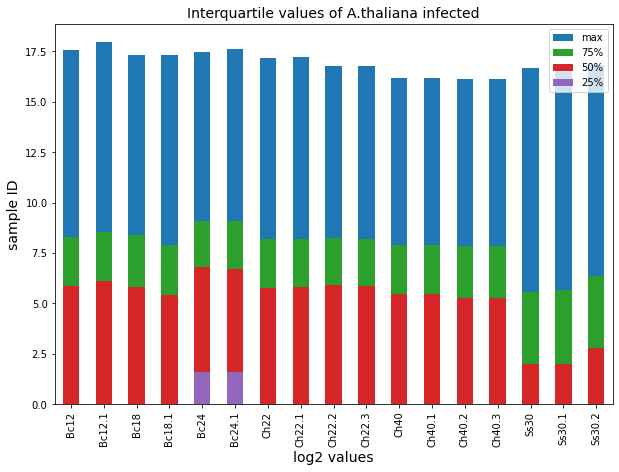

In [16]:
ax = df_plot.plot(x="ID", y="max", kind="bar", title="A.thaliana infected: interquartile values", figsize=(10,7))
df_plot.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_plot.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile values of A.thaliana infected',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('sample ID',fontsize=14);
#plt.show()

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


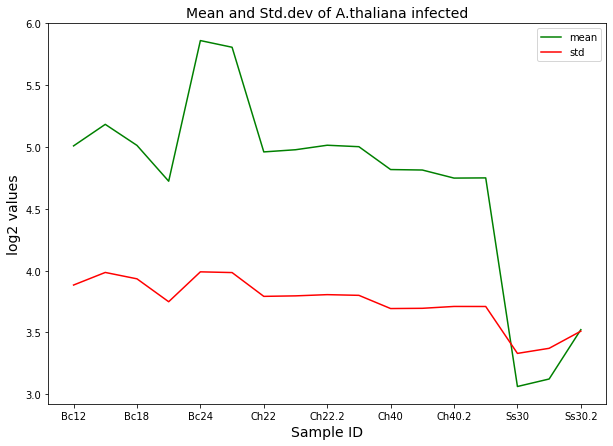

In [17]:
## gca stands for 'get current axis'
ax = plt.gca()
df_plot.plot(kind='line',x='ID',y='mean',color='green', ax=ax, figsize=(10,7))
df_plot.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev of A.thaliana infected',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);

### Checking for genes with zeros across samples

In [18]:
df1.head(5)

,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808


In [19]:
## Check number of zeros by sample

sr_ceros = df1.isin([0]).sum()
type(sr_ceros)
## transform the pandas serie into a pandas df
df_ceros = sr_ceros.to_frame()

## format the df (idx)
df_ceros.columns = df_ceros.iloc[0]
df_ceros = df_ceros.drop(df_ceros.index[0])
#df_ceros.head()

## call a function to set ID labels 
df_ceros = df_with_label_ID(df_ceros)
df_ceros.head(5)
df_ceros.to_csv("../results-data/infected_zeros_bysample.csv", index=False, header=True)

***Here, zeros are counted by genes across all samples & a new column with the zero-counter values is appended to the matrix*** <br>
We create the file called: **all_infected_counterOFzeros.csv** contains the counter of zeros by gene <br>


In [20]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
#print(s_zeros)
#type(s_zeros)    ### build a serie-pandas
## Desglozando la formula
#(df1 == 0)
#(df1 == 0).astype(int)
#(df1 == 0).sum(axis=1)

## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the new matrix to all_log2_counter_cero.csv 
df1 = set_ID_samples(df1)
df1.to_csv('../results-data/all_infected_counterOFzeros.csv', sep='\t', index=True)

Here, we look for genes with n number of ceros <br>
We create the file called: **all_infected_genes_w17zeros.csv** contains the detail of these genes with cero counts across all samples <br>

In [21]:
## Filter is looking for genes with 17 ceros across samples (we have 17 samples)
is_zero = (df1['zero-counter']>=17)     
df1_17 = df1[is_zero]
print(df1_17.shape)
df1_17.head(7)
## Send the new df to all_log2_counter_cero.csv 
df1_17.to_csv('../results-data/all_infected_genes_w17zeros.csv', sep='\t', index=True)

(3415, 19)


### Trimming of genes with ceros across all samples
1) Data are normalized to log2<br>
2) Remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 8 muestras, entonces 8 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo expresión de ese gen para ninguna de las muestra. <br>
x =   es Si  -1

In [22]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_17['Genes'])
with open("../results-data/all_infected_geneIDs_with_zeros.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [23]:
## Here, we count how many genes are not expressed in all the samples
df1_17.isin([0]).sum().head()

Genes        0
Bc24      3415
Ch40.3    3415
Ch40      3415
Ss30      3415
dtype: int64

In [24]:
# call the function  ==== df_drop_idx_list ==== to get the index of the genes to remove (df1_17) from the df1
df1 = df_drop_idx_list(df1_17, df1)

In [25]:
print(df1.shape)
df1.head(5)

(24240, 19)


,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2,zero-counter
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515,0
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196,0
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432,0
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781,0
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808,0


### New stats of the filtered data

In [6]:
## Save the new df with the ID genes with 17 ceros across all samples removed.
df1.to_csv('../results-data/all_infected_Log2_17ceros_drop.csv', sep='\t', index=True)

NameError: name 'file' is not defined

In [30]:
## Get some stats of the new matrix filtered of zeros in common
df_tmp = df1.describe().T
df_tmp.drop(df_tmp.tail(1).index,inplace=True) # drop last n rows / or first n rows (.head)
df_tmp 

,count,mean,std,min,25%,50%,75%,max
Bc24,24240.0,6.687420,3.555319,0.0,4.247928,7.475733,9.375039,17.465495
Ch40.3,24240.0,5.419530,3.474528,0.0,2.321928,6.066089,8.129283,16.122181
Ch40,24240.0,5.496554,3.439148,0.0,2.584963,6.228819,8.174926,16.174438
Ss30,24240.0,3.493364,3.338167,0.0,0.000000,2.807355,6.066089,16.665294
Ss30.1,24240.0,3.562655,3.376057,0.0,0.000000,3.000000,6.149747,16.796078
Bc12,24240.0,5.715049,3.629133,0.0,2.321928,6.658211,8.546894,17.584786
Bc18,24240.0,5.719562,3.689411,0.0,2.321928,6.643856,8.640245,17.338092
Ss30.2,24240.0,4.018346,3.472772,0.0,0.000000,3.700440,6.768184,16.806059
Bc18.1,24240.0,5.389064,3.527191,0.0,2.000000,6.189825,8.169925,17.307619
Bc12.1,24240.0,5.913839,3.714734,0.0,2.584963,6.894818,8.807355,17.972750


In [31]:
## call a function to set ID to the accesions
df_tmp = df_with_label_ID(df_tmp)
df_tmp.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
5,Bc12,24240.0,5.715049,3.629133,0.0,2.321928,6.658211,8.546894,17.584786
9,Bc12.1,24240.0,5.913839,3.714734,0.0,2.584963,6.894818,8.807355,17.972750
6,Bc18,24240.0,5.719562,3.689411,0.0,2.321928,6.643856,8.640245,17.338092
8,Bc18.1,24240.0,5.389064,3.527191,0.0,2.000000,6.189825,8.169925,17.307619
0,Bc24,24240.0,6.687420,3.555319,0.0,4.247928,7.475733,9.375039,17.465495


In [32]:
df_tmp.sort_values(by=['ID'], inplace=True)
df_tmp.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
5,Bc12,24240.0,5.715049,3.629133,0.0,2.321928,6.658211,8.546894,17.584786
9,Bc12.1,24240.0,5.913839,3.714734,0.0,2.584963,6.894818,8.807355,17.972750
6,Bc18,24240.0,5.719562,3.689411,0.0,2.321928,6.643856,8.640245,17.338092
8,Bc18.1,24240.0,5.389064,3.527191,0.0,2.000000,6.189825,8.169925,17.307619
0,Bc24,24240.0,6.687420,3.555319,0.0,4.247928,7.475733,9.375039,17.465495


In [33]:
df_tmp.to_csv("../results-data/infected_stats_noZeros_tesis.csv", index=False, header=True)

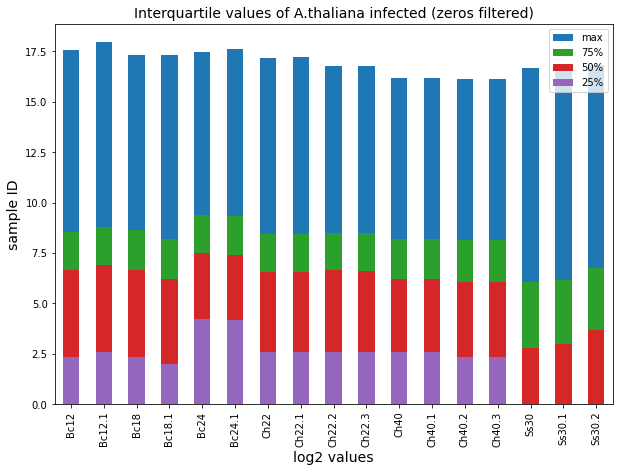

In [34]:
#plt.figure(figsize=(10,7))

ax = df_tmp.plot(x="ID", y="max", kind="bar", title="A.thaliana infected: interquartile values", figsize=(10,7))
df_tmp.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_tmp.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_tmp.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('Interquartile values of A.thaliana infected (zeros filtered)',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('sample ID',fontsize=14);

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


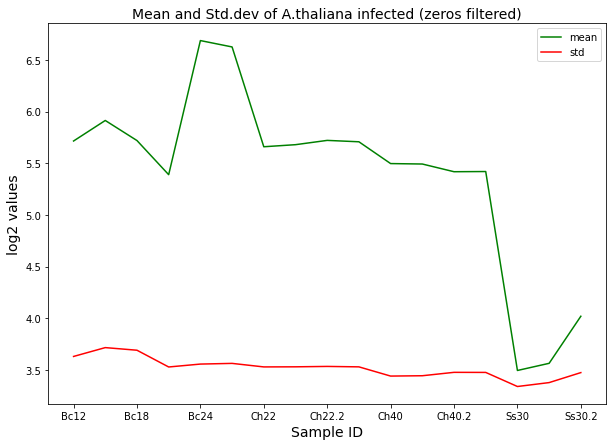

In [35]:
## gca stands for 'get current axis'
#plt.figure(figsize=(10,7))
ax = plt.gca()

df_tmp.plot(kind='line',x='ID',y='mean',color='green', ax=ax, figsize=(10,7))
df_tmp.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('Mean and Std.dev of A.thaliana infected (zeros filtered)',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bc12'),
  Text(1, 0, 'Bc12.1'),
  Text(2, 0, 'Bc18'),
  Text(3, 0, 'Bc18.1'),
  Text(4, 0, 'Bc24'),
  Text(5, 0, 'Bc24.1'),
  Text(6, 0, 'Bc24.2'),
  Text(7, 0, 'Ch22'),
  Text(8, 0, 'Ch22.1'),
  Text(9, 0, 'Ch22.2'),
  Text(10, 0, 'Ch22.3'),
  Text(11, 0, 'Ch40'),
  Text(12, 0, 'Ch40.1'),
  Text(13, 0, 'Ch40.2'),
  Text(14, 0, 'Ss30'),
  Text(15, 0, 'Ss30.1'),
  Text(16, 0, 'Ss30.2')])

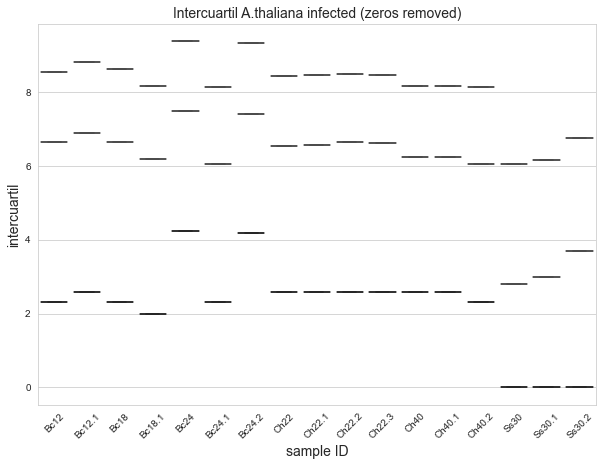

In [68]:
#df_tmp.head(5)
plt.figure(figsize=(10,7))
ax = plt.gca()
#Draw a vertical boxplot grouped by a categorical variable: 
#sns.set_style("whitegrid") 
ax = sns.boxplot(x = 'ID',y = '25%',data = df_tmp, color = 'green') 
ax = sns.boxplot(x = 'ID',y = '50%',data = df_tmp, color = 'yellow') 
ax = sns.boxplot(x = 'ID',y = '75%',data = df_tmp, color = 'red') 
plt.xlabel('sample ID',fontsize=14);
plt.ylabel('intercuartil',fontsize=14);
plt.title('Intercuartil A.thaliana infected (zeros removed)',fontsize=14)
plt.xticks(rotation=45)


In [329]:
## check changes in Q1 
col_ceros = df_tmp['25%'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)

[0.0, 0.0, 0.0, 2.0, 2.3219280948873617, 2.3219280948873617, 2.3219280948873617, 2.3219280948873617, 2.5849625007211556, 2.5849625007211556, 2.5849625007211556, 2.5849625007211556, 2.5849625007211556, 2.5849625007211556, 2.5849625007211556, 4.169925001442312, 4.247927513443585]


### Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [36]:
# load file to be plotted
print(os.getcwd())
df_nozeros = pd.read_csv("../results-data/all_infected_Log2_17ceros_drop.csv", sep='\t')  #all_infected_Log2_17ceros_drop.csv
# remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head(3))

## Get sample list names
sample_lst=df_nozeros.columns
print(sample_lst)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts
       Bc24    Ch40.3      Ch40      Ss30    Ss30.1      Bc12      Bc18  \
0  8.577429  6.930737  7.098032  3.000000  5.614710  6.539159  7.044394   
1  7.228819  6.727920  7.000000  5.129283  5.357552  7.149747  7.400879   
2  5.727920  3.584963  3.807355  4.459432  5.087463  2.807355  4.523562   

     Ss30.2    Bc18.1    Bc12.1      Ch22    Ch22.1    Ch40.1    Ch22.2  \
0  5.781360  6.044394  6.988685  6.965784  6.977280  7.033423  7.209453   
1  5.285402  6.918863  7.375039  7.467606  7.330917  6.954196  7.531381   
2  5.392317  4.321928  4.392317  3.169925  3.169925  3.000000  3.459432   

     Bc24.1    Ch22.3    Ch40.2  
0  8.607330  7.149747  6.942515  
1  7.139551  7.643856  6.954196  
2  5.906891  3.000000  3.459432  
Index(['Bc24', 'Ch40.3', 'Ch40', 'Ss30', 'Ss30.1', 'Bc12', 'Bc18', 'Ss30.2',
       'Bc18.1', 'Bc12.1', 'Ch22', 'Ch22.1', 'Ch40.1', 'Ch22.2', 'Bc24.1',
       'Ch22.3', 'Ch40.2'],
      d

Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

###  Adding labels for plotting (leyends)


In [38]:
sample_lst

Index(['Bc24', 'Ch40.3', 'Ch40', 'Ss30', 'Ss30.1', 'Bc12', 'Bc18', 'Ss30.2',
       'Bc18.1', 'Bc12.1', 'Ch22', 'Ch22.1', 'Ch40.1', 'Ch22.2', 'Bc24.1',
       'Ch22.3', 'Ch40.2'],
      dtype='object')

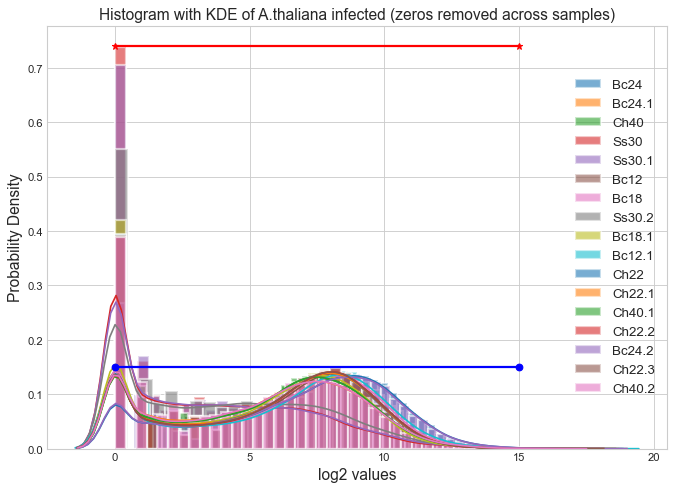

In [72]:
# Plot the distributions: values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with KDE of A.thaliana infected (zeros removed across samples)',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('Probability Density',fontsize=14);
#plt.suptitle("A.thaliana infected (zeros removed across all samples)", fontsize=14)
## add arbitrary lines to canvas
plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 15], [.74, .74], 'k-', lw=2, color='red',marker = '*')
#plt.text(15, 0.6, "Size:86.19%",fontsize=24)
plt.legend(loc='center right',fontsize=12);    
#plt.savefig("../plots/all_infected_KDE_17zeros_drop.png");

In [73]:
df_sclerotinia = df_nozeros[['Ss30', 'Ss30.1', 'Ss30.2']]
df_sclerotinia.head(5)
sample_lst_sc = ['Ss30', 'Ss30.1', 'Ss30.2']

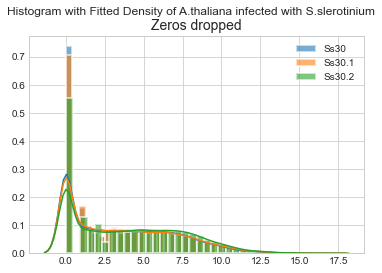

In [79]:
for file in sample_lst_sc:
    sample_data = df_sclerotinia[file].tolist()
    #print(sample_data)
    #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Zeros dropped',fontsize=14);
plt.suptitle("Histogram with Fitted Density of A.thaliana infected with S.slerotinium")   #Q1=0.186
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");

### A bit more of filters 

### Based on the stats gotten we apply a cutoff at 4.728
average of Q1:0.18646617655543 <br>
average of Q2: 5.19825009357447 <br>
average of Q3: 7.83581871612983 <br>
average of mean: 4.72897985764741 <br>

In [39]:
len(sample_lst)
#df_nozeros.head(5)
#df1.head(5)

17

In [40]:
# df1 has the Gene headers required for additional trimming
df1.shape
df1.head(5)

,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2,zero-counter
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515,0
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196,0
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432,0
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781,0
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808,0


In [41]:
df1.shape
print(df1.head(3))
print(sample_lst)

       Genes      Bc24    Ch40.3      Ch40      Ss30    Ss30.1      Bc12  \
0  AT1G01010  8.577429  6.930737  7.098032  3.000000  5.614710  6.539159   
1  AT1G01020  7.228819  6.727920  7.000000  5.129283  5.357552  7.149747   
2  AT1G01030  5.727920  3.584963  3.807355  4.459432  5.087463  2.807355   

       Bc18    Ss30.2    Bc18.1    Bc12.1      Ch22    Ch22.1    Ch40.1  \
0  7.044394  5.781360  6.044394  6.988685  6.965784  6.977280  7.033423   
1  7.400879  5.285402  6.918863  7.375039  7.467606  7.330917  6.954196   
2  4.523562  5.392317  4.321928  4.392317  3.169925  3.169925  3.000000   

     Ch22.2    Bc24.1    Ch22.3    Ch40.2  zero-counter  
0  7.209453  8.607330  7.149747  6.942515             0  
1  7.531381  7.139551  7.643856  6.954196             0  
2  3.459432  5.906891  3.000000  3.459432             0  
Index(['Bc24', 'Ch40.3', 'Ch40', 'Ss30', 'Ss30.1', 'Bc12', 'Bc18', 'Ss30.2',
       'Bc18.1', 'Bc12.1', 'Ch22', 'Ch22.1', 'Ch40.1', 'Ch22.2', 'Bc24.1',
       'Ch

In [77]:
## Filtering across samples (we have 17 samples)
from collections import defaultdict
dict_cut = defaultdict(list)

size_original = len(df_nozeros)
print(size_original)
#cut_value = 0.186     ## Q1 (avergae)
#cut_value = 5.198    ## Q2 (avergae)
cut_value = 7.835     ## Q3 (average)
b_first=True

for sample in sample_lst:   #parse all the samples
    if b_first:
        df_cut = filter_df(df1, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        b_first = False       
        dict_cut['ID'].append(sample)    
        dict_cut['genes_cut'].append(size)
        
    else:
        df_cut = filter_df(df_cut, (sample, cut_value))
        size_new = len(df_cut)
        size = size_original - size_new
        #print('Removed from '+ sample,str(size))
        dict_cut['ID'].append(sample)
        dict_cut['genes_cut'].append(size)

df_cut_stats = pd.DataFrame(dict_cut)
print(len(df_cut))
df_cut.head(5)

24240
1824


,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2,zero-counter
8,AT1G01090,11.240791,9.197217,9.074141,8.581201,8.668885,10.417853,10.787086,9.501837,10.422065,10.658211,9.726218,9.640245,9.264443,9.643856,11.102632,9.746514,9.330917,0
11,AT1G01120,9.481799,7.918863,8.675957,11.512247,12.283088,11.527477,8.971544,12.009479,10.094078,11.903882,8.994353,9.047124,8.507795,10.292322,9.370687,10.277287,8.011227,0
13,AT1G01140,11.418907,10.277287,10.348728,9.214319,9.136991,10.660887,11.643856,9.513728,10.801708,11.009829,10.500842,10.548822,10.328675,10.820977,11.549303,10.767357,10.287712,0
17,AT1G01180,9.533330,8.558421,8.562242,7.930737,7.948367,8.409391,8.997179,8.022368,8.379378,8.321928,8.280771,8.467606,8.596190,8.335390,9.403012,8.330917,8.388017,0
45,AT1G01440,9.651052,9.266787,8.982994,8.370687,9.087463,8.392317,8.731319,8.807355,8.294621,8.499846,8.693487,8.636625,9.008429,8.543032,9.675957,8.668885,9.231221,0


In [78]:
#df_cut.to_csv('../results-data/all_infected_Log2_17ceros_Q1_drop.csv', sep='\t', index=False)
#df_cut.to_csv('../results-data/all_infected_Log2_17ceros_Q2_drop.csv', sep='\t', index=False)
df_cut.to_csv('../results-data/all_infected_Log2_17ceros_Q3_drop.csv', sep='\t', index=False)

In [79]:
df_cut_stats.head(5)

,ID,genes_cut
0,Bc24,13187
1,Ch40.3,17664
2,Ch40,17870
3,Ss30,21620
4,Ss30.1,21749


In [80]:
## Get some stats of the new matrix
df_tmp = df_cut.describe().T
df_tmp

,count,mean,std,min,25%,50%,75%,max
Bc24,1824.0,11.281877,1.194950,8.276124,10.434368,11.171176,11.902752,17.465495
Ch40.3,1824.0,10.376012,1.221140,7.857981,9.516684,10.191675,11.041828,16.122181
Ch40,1824.0,10.269620,1.180161,7.888743,9.451211,10.105909,10.911392,16.174438
Ss30,1824.0,9.504214,1.380714,7.839204,8.459432,9.186114,10.125413,15.787061
Ss30.1,1824.0,9.609514,1.407140,7.839204,8.558421,9.269127,10.272043,15.914385
Bc12,1824.0,9.839378,1.196842,7.845490,8.974415,9.699572,10.480789,15.725952
Bc18,1824.0,10.330988,1.199546,7.912889,9.477252,10.157978,10.968483,15.597238
Ss30.2,1824.0,10.012053,1.326595,7.960002,9.038233,9.700440,10.632086,15.947865
Bc18.1,1824.0,9.787138,1.186216,7.845490,8.939579,9.607329,10.419696,15.588451
Bc12.1,1824.0,10.092859,1.217067,7.845490,9.208844,9.945443,10.738930,16.182045


In [81]:
df_tmp.drop(df_tmp.tail(1).index,inplace=True) # drop last n rows / or first n rows (.head)
df_tmp = df_with_label_ID(df_tmp)
df_tmp.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
5,Bc12,1824.0,9.839378,1.196842,7.845490,8.974415,9.699572,10.480789,15.725952
9,Bc12.1,1824.0,10.092859,1.217067,7.845490,9.208844,9.945443,10.738930,16.182045
6,Bc18,1824.0,10.330988,1.199546,7.912889,9.477252,10.157978,10.968483,15.597238
8,Bc18.1,1824.0,9.787138,1.186216,7.845490,8.939579,9.607329,10.419696,15.588451
0,Bc24,1824.0,11.281877,1.194950,8.276124,10.434368,11.171176,11.902752,17.465495


In [82]:
df_tmp.sort_values(by=['ID'], inplace=True)
df_tmp.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
5,Bc12,1824.0,9.839378,1.196842,7.845490,8.974415,9.699572,10.480789,15.725952
9,Bc12.1,1824.0,10.092859,1.217067,7.845490,9.208844,9.945443,10.738930,16.182045
6,Bc18,1824.0,10.330988,1.199546,7.912889,9.477252,10.157978,10.968483,15.597238
8,Bc18.1,1824.0,9.787138,1.186216,7.845490,8.939579,9.607329,10.419696,15.588451
0,Bc24,1824.0,11.281877,1.194950,8.276124,10.434368,11.171176,11.902752,17.465495


In [83]:
#df_tmp.to_csv("../results-data/infected_stats_noZeros_Q1_tesis.csv", index=False, header=True)
#df_tmp.to_csv("../results-data/infected_stats_noZeros_Q2_tesis.csv", index=False, header=True)
df_tmp.to_csv("../results-data/infected_stats_noZeros_Q3_tesis.csv", index=False, header=True)

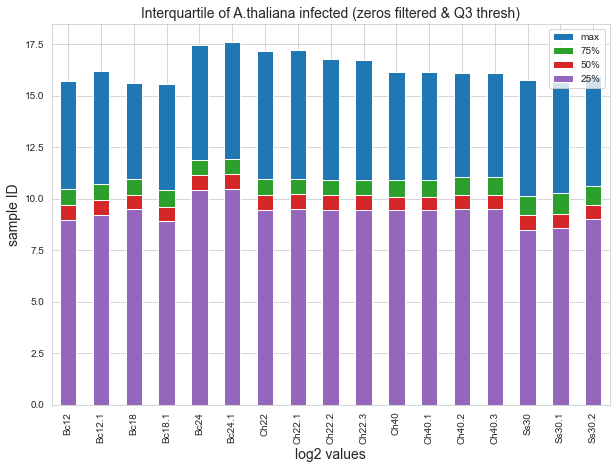

In [84]:
#plt.figure(figsize=(10,7))

ax = df_tmp.plot(x="ID", y="max", kind="bar", figsize=(10,7))
df_tmp.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_tmp.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_tmp.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
#plt.title('Interquartile of A.thaliana infected (zeros filtered & Q1 thresh)',fontsize=14);
#plt.title('Interquartile of A.thaliana infected (zeros filtered & Q2 thresh)',fontsize=14);
plt.title('Interquartile of A.thaliana infected (zeros filtered & Q3 thresh)',fontsize=14);
plt.xlabel('log2 values',fontsize=14);
plt.ylabel('sample ID',fontsize=14);


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bc12'),
  Text(1, 0, 'Bc12.1'),
  Text(2, 0, 'Bc18'),
  Text(3, 0, 'Bc18.1'),
  Text(4, 0, 'Bc24'),
  Text(5, 0, 'Bc24.1'),
  Text(6, 0, 'Ch22'),
  Text(7, 0, 'Ch22.1'),
  Text(8, 0, 'Ch22.2'),
  Text(9, 0, 'Ch22.3'),
  Text(10, 0, 'Ch40'),
  Text(11, 0, 'Ch40.1'),
  Text(12, 0, 'Ch40.2'),
  Text(13, 0, 'Ch40.3'),
  Text(14, 0, 'Ss30'),
  Text(15, 0, 'Ss30.1'),
  Text(16, 0, 'Ss30.2')])

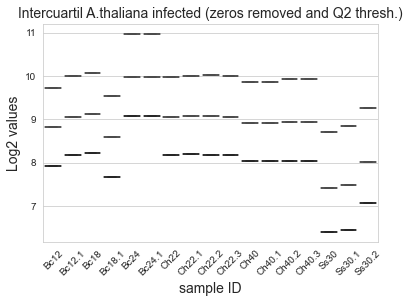

In [75]:
ax = plt.gca()

# Draw a vertical boxplot grouped  
# by a categorical variable: 
sns.set_style("whitegrid") 

sns.boxplot(x = 'ID',y = '25%',data = df_tmp, color = 'green') #x = 'sample', y = '50%'
sns.boxplot(x = 'ID',y = '50%',data = df_tmp, color = 'yellow') #x = 'sample', y = '50%', 
sns.boxplot(x = 'ID',y = '75%',data = df_tmp, color = 'red') #x = 'sample', y = '50%', 
plt.xlabel('sample ID',fontsize=14);
plt.ylabel('Log2 values',fontsize=14);
#plt.title('Intercuartil A.thaliana infected (zeros removed and Q1 thresh.)',fontsize=14)
#plt.title('Intercuartil A.thaliana infected (zeros removed and Q2 thresh.)',fontsize=14)
#plt.title('Intercuartil A.thaliana infected (zeros removed and Q3 threshold)',fontsize=14)
plt.xticks(rotation=45)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


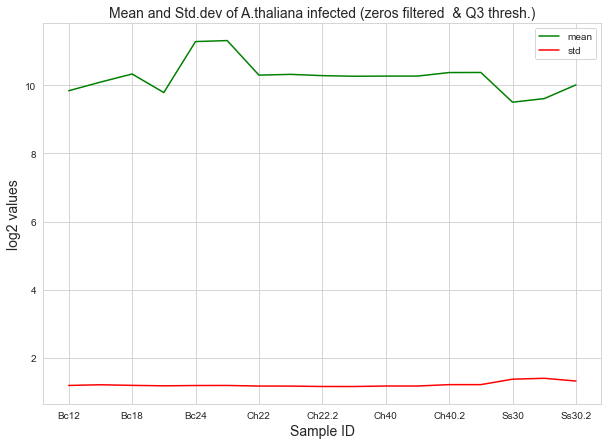

In [85]:
## gca stands for 'get current axis'
ax = plt.gca()
df_tmp.plot(kind='line',x='ID',y='mean',color='green', ax=ax, figsize=(10,7))
df_tmp.plot(kind='line',x='ID',y='std', color='red', ax=ax)
#plt.title('Mean and Std.dev of A.thaliana infected (zeros filtered  & Q1 thresh.)',fontsize=14);
#plt.title('Mean and Std.dev of A.thaliana infected (zeros filtered  & Q2 thresh.)',fontsize=14);
plt.title('Mean and Std.dev of A.thaliana infected (zeros filtered  & Q3 thresh.)',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('log2 values',fontsize=14);

In [124]:
# load file : format df to plot distributions

df_nozeros=pd.read_csv("../results-data/all_infected_Log2_17ceros_Q1_drop.csv", sep='\t')
#df_nozeros=pd.read_csv("../results-data/all_infected_Log2_17ceros_Q2_drop.csv", sep='\t')
#df_nozeros=pd.read_csv("../results-data/all_infected_Log2_17ceros_Q3_drop.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
#print(df_nozeros.head(3))

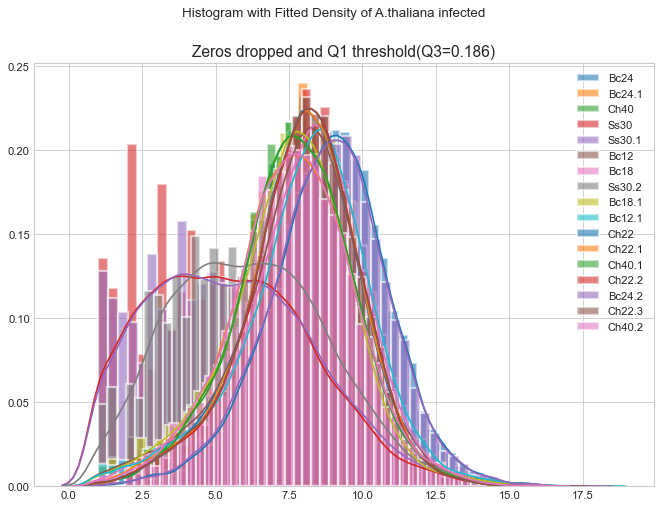

In [125]:
plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Zeros dropped and Q1 threshold(Q3=0.186)',fontsize=14);
#plt.title('Zeros dropped and Q2 threshold(Q3=5.198)',fontsize=14);
#plt.title('Zeros dropped and Q3 threshold(Q3=7.835)',fontsize=14);
plt.suptitle("Histogram with Fitted Density of A.thaliana infected")   #Q1=0.186
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");

In [108]:
df_nozeros.columns

Index(['Bc24', 'Bc24.1', 'Ch40', 'Ss30', 'Ss30.1', 'Bc12', 'Bc18', 'Ss30.2',
       'Bc18.1', 'Bc12.1', 'Ch22', 'Ch22.1', 'Ch40.1', 'Ch22.2', 'Bc24.2',
       'Ch22.3', 'Ch40.2'],
      dtype='object')

In [109]:
df_sclerotinia = df_nozeros[['Ss30', 'Ss30.1', 'Ss30.2']]
df_sclerotinia.head(5)

,Ss30,Ss30.1,Ss30.2
0,8.581201,8.668885,9.501837
1,11.512247,12.283088,12.009479
2,9.214319,9.136991,9.513728
3,7.930737,7.948367,8.022368
4,8.370687,9.087463,8.807355


In [110]:
sample_lst_sc = ['Ss30', 'Ss30.1', 'Ss30.2']

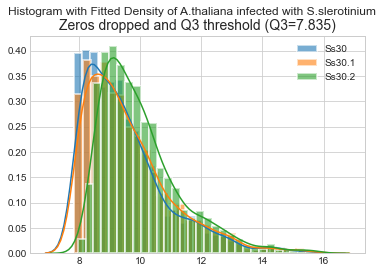

In [113]:
for file in sample_lst_sc:
    sample_data = df_sclerotinia[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

#plt.title('Zeros dropped and Q2 threshold (Q2=5.198)',fontsize=14);
plt.title('Zeros dropped and Q3 threshold (Q3=7.835)',fontsize=14);
plt.suptitle("Histogram with Fitted Density of A.thaliana infected with S.slerotinium")   #Q1=0.186
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");